<a href="https://colab.research.google.com/github/jiho-kang/DL_CNN_STUDY/blob/main/04_CIFAR10_Custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

### CIFAR10 Dataset 생성 
* tf.keras.datasets의 cifar10.load_data()는 웹에서 Local computer로 Download후 train과 test용 image와 label array로 로딩. 

In [22]:
from tensorflow.keras.datasets import cifar10

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

# 보통 label은 (500000, )인데, 여기는 2차원으로 되어있음.

train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


In [23]:
train_images[0, :, :, :], train_labels[0, :]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [24]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


### CIFAR10 데이터 시각화
* 이미지 크기는 32x32이며 RGB채널. 
* 전반적으로 Label에 해당하는 대상이 이미지의 중앙에 있고, Label 대상 오브젝트 위주로 이미지가 구성. 

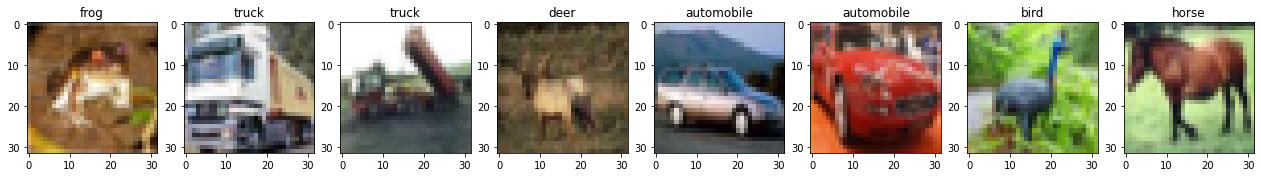

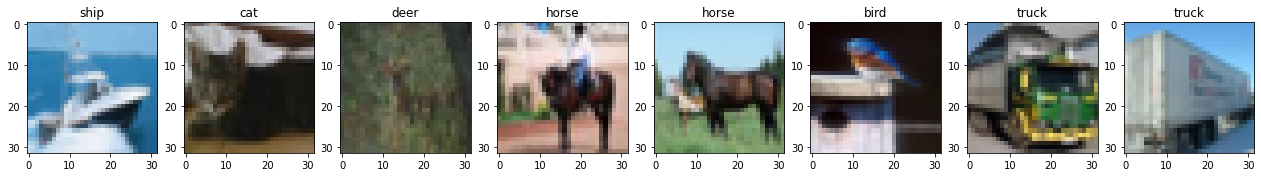

In [25]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze()
        axs[i].set_title(NAMES[int(label)])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### Data preprocessing
* image array의 0 ~ 255 사이의 값으로 되어 있는 pixel intensity 값을 0 ~ 1 사이 값으로 변환. 정수값 pixel 값을 255.0 으로 나눔. 
* label array는 숫자형 값으로 바꾸되, 원-핫 인코딩을 적용할지 선택. 일반적으로 원-핫 인코딩을 적용하는게 Keras Framework활용이 용이
* image array, label array 모두 float32 형으로 변환. numpy 의 float32는 tensor 변환시 tf.float32 로 변환되며 기본적으로 Tensorflow backend Keras는 tf.float32를 기반으로 함. 


In [26]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# label은 원-핫 인코딩이 Keras에서는 활용이 용이하나, 여기서는 sparse categorical crossentropy 테스트를 위해 적용하지 않음. 
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [27]:
train_images[0], train_labels[0]

(array([[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],
 
        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],
 
        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],
 
        ...,
 
        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333

In [28]:
# Keras는 CNN(정확히는 CNN 2D) 모델에 학습 데이터를 입력할 시 반드시 Image array는 4차원 배열이 되어야 함. 
# RGB 채널 이미지 array는 기본적으로 3차원임. 여기에 이미지의 갯수를 포함하므로 4차원이 됨.  
# 만일 Grayscale인 2차원 이미지 array라도 의도적으로 채널을 명시해서 3차원으로 만들어 주고, 여기에 이미지 개수를 포함해서 4차원이 됨. 

print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [29]:
# label 데이터가 2차원임. 이를 Keras 모델에 입력해도 별 문제없이 동작하지만, label의 경우는 OHE적용이 안되었는지를 알 수 있게 명확하게 1차원으로 표현해 주는것이 좋음. 
# 2차원인 labels 데이터를 1차원으로 변경. 
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()
print('train label shape:', train_labels.shape, 'test label shape:', test_labels.shape)
print(train_labels[0])

train label shape: (50000,) test label shape: (10000,)
6.0


### Custom Model 생성
* CNN Model의 맨처음 Layer는 Input layer. Input layer의 shape를 이미지 사이즈와 RGB 3채널에 맞게 (32, 32, 3) 으로 설정.
* Conv 연산을 연달아 적용하고 MaxPooling을 적용하는 루틴으로 모델 생성. MaxPooling을 적용 후에는 필터 갯수를 더욱 증가 시킴. 
* MaxPooling 적용 후에 출력 피처맵의 사이즈는 작아지되, 채널(깊이)는 늘어나는 형태로 모델 생성. 
* CIFAR10의 Label수가 10개이므로 Classification을 위한 맨 마지막 Dense layer의 units 갯수는 10개임
* label값이 원-핫 인코딩 되지 않았기 때문에 model.compile()에서 loss는 반드시 sparse_categorical_crossentropy여야함. 
* 만일 label값이 원-핫 인코딩 되었다면 loss는 categorical_crossentropy 임. 

In [30]:
IMAGE_SIZE = 32

In [31]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
# 일반적으로 인풋 사이즈가 32보다는 크니까 kernerl은 (5,5) 이상을 사용. 현재는 인풋 사이즈가 작으니 (3,3)을 사용해보자
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 16, 16, 64)        0         
                                                           

In [32]:
# optimizer는 Adam으로 설정하고, label값이 원-핫 인코딩이 아니므로 loss는 sparse_categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model 학습 수행 및 테스트 데이터로 평가 
* Model의 fit() 메소드를 호출하여 학습
* fit()은 학습 데이터가 Numpy array 자체로 들어올때, Generator 형태로 들어올때 약간의 수행로직 차이가 있음. 
* 인자로 x에는 학습 image data, y는 학습 label 데이터. 
* batch_size는 한번에 가져올 image/label array 갯수. 1개씩 가져오면 수행속도가 너무 느리고, 전체를 가져오면 GPU Memory 부족이 발생할 수 있으므로 적절한 batch_size 설정이 필요. 만약 학습 데이터가 generator일 경우, fit()에서 batch_size를 설정하지 않음. 
* epochs 는 전체 학습 데이터 학습을 반복 수행할 횟수
* steps_per_epoch는 전체 학습 데이터를 몇번 배치 작업으로 수행하는가를 의미. 보통 입력데이터가 generator일 경우 설정. 
* validation_data는 검증용 데이터 세트
* validation_steps는 검증용 데이터의 steps_per_epoch임. 
* validation_split는 validation_data로 별도의 검증용 데이터 세트를 설정하지 않고 자동으로 학습용 데이터에서 검증용 데이터 세트 분할. 


In [33]:
history = model.fit(x=train_images, y=train_labels, batch_size=1000, epochs=30, validation_split=0.15 )

Epoch 1/30
43/43 [==============================] - 3s 46ms/step - loss: 2.0203 - accuracy: 0.2546 - val_loss: 1.6991 - val_accuracy: 0.3709
Epoch 2/30
43/43 [==============================] - 2s 40ms/step - loss: 1.6364 - accuracy: 0.3995 - val_loss: 1.4963 - val_accuracy: 0.4524
Epoch 3/30
43/43 [==============================] - 2s 40ms/step - loss: 1.4686 - accuracy: 0.4642 - val_loss: 1.3619 - val_accuracy: 0.5023
Epoch 4/30
43/43 [==============================] - 2s 40ms/step - loss: 1.3433 - accuracy: 0.5120 - val_loss: 1.2513 - val_accuracy: 0.5556
Epoch 5/30
43/43 [==============================] - 2s 41ms/step - loss: 1.2438 - accuracy: 0.5537 - val_loss: 1.1420 - val_accuracy: 0.5969
Epoch 6/30
43/43 [==============================] - 2s 40ms/step - loss: 1.1612 - accuracy: 0.5854 - val_loss: 1.0760 - val_accuracy: 0.6180
Epoch 7/30
43/43 [==============================] - 2s 40ms/step - loss: 1.0771 - accuracy: 0.6176 - val_loss: 1.0207 - val_accuracy: 0.6371
Epoch 8/30
43

313/313 [==============================] - 1s 3ms/step - loss: 0.6213 - accuracy: 0.7894


[0.6212841272354126, 0.7893999814987183]

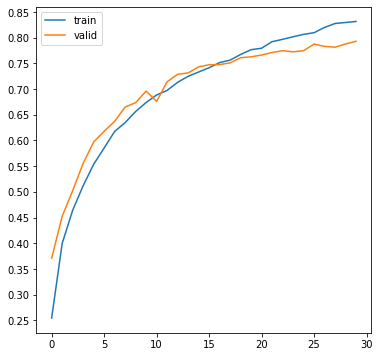

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_labels)

### model.predict()를 통해 이미지 분류 예측
* 4차원 이미지 배열을 입력해서 모델학습함. predict()시에도 4차원 이미지 배열을 입력해야함. 
* 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원 임에 유의  

In [35]:
# 아래 코드는 오류 발생. Conv2D를 사용한 모델에 4차원 이미지 배열을 입력해서 모델을 학습했으므로 predict()시에도 테스트용 4차원 이미지 배열을 입력해야 함.  
print(test_images[0].shape)
preds = model.predict(test_images[0])

(32, 32, 3)


ValueError: ignored

In [36]:
# 테스트용 4차원 이미지 배열을 입력해서 predict()수행. 
# predict()의 결과는 softmax 적용 결과임. 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원 임에 유의 
preds = model.predict(np.expand_dims(test_images[0], axis=0))
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

예측 결과 shape: (1, 10)
예측 결과: [[1.5299163e-04 4.9574843e-05 1.1418134e-03 6.4917666e-01 5.1629282e-05
  3.4309247e-01 5.9507941e-03 2.3031468e-04 1.2619060e-04 2.7601976e-05]]


In [37]:
preds = model.predict(test_images[:32], batch_size=32)
print('예측 결과 shape:', preds.shape)
# print('예측 결과:', preds)

예측 결과 shape: (32, 10)


In [38]:
predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

예측 클래스 값: [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6 7 2 4 9 4 2 5 0 9 6 6 5]


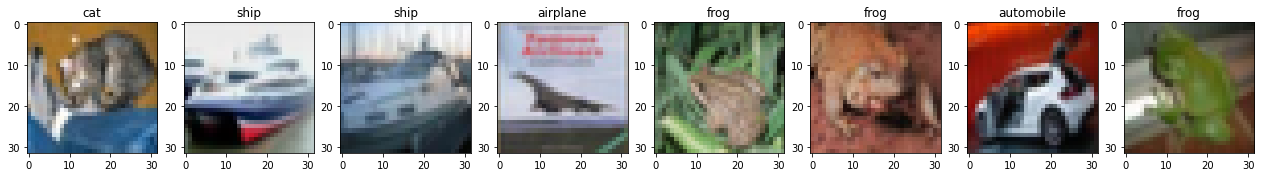

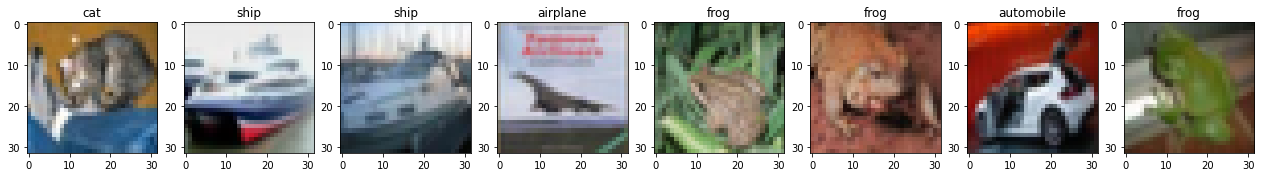

In [39]:
show_images(test_images[:8], predicted_class[:8], ncols=8)
show_images(test_images[:8], test_labels[:8], ncols=8)

### 평균이 1 이고 표준편차가 1인 표준 정규분포에서 난수 추출
* 표준 편차가 클 수록 개별 값의 크기가 일반적으로 커짐.

In [40]:
numbers = np.random.normal(loc=0.0,scale=1,size=[100, 100]) # loc: 평균의 위치  # scale: 표준편차  # size: 차원과 갯수
print(numbers)
print(numbers.mean())
print(numbers.std())
print(numbers.sum())

[[-0.62643564 -1.44772014  0.11696925 ...  0.6187573  -0.54109104
   0.17442741]
 [-0.28168392 -0.54005113  1.24645683 ...  0.70674474 -1.39775395
   0.0398007 ]
 [-0.05427505  0.84835196  1.63117804 ... -2.67130256 -0.95105067
   0.12835856]
 ...
 [-0.85681797 -0.31920013 -0.49590712 ...  0.64558754  0.53763635
  -0.64760702]
 [ 0.87670222  0.83929595  1.23757906 ...  0.47735545 -0.73308111
  -0.93285753]
 [-2.04574667  1.83009477 -3.30487984 ...  0.38902867 -1.07646873
   0.21315858]]
-0.011627068312786525
0.9911159993393904
-116.27068312786525


### Xavier initialization - 정규분포(glorot_normal), 균일분포(glorot_uniform) 

In [41]:
# glorot_normal 정규분포
fan_in = 20
fan_out = 15
scale_value = np.sqrt(2/(fan_in + fan_out))
print('scale:', scale_value)
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

scale: 0.23904572186687872
[[ 0.26983769 -0.33942298 -0.24396145 ... -0.37727935 -0.21893383
   0.15347674]
 [ 0.0892502  -0.3392229   0.07343333 ... -0.24950585  0.3616799
  -0.51067875]
 [ 0.3418583   0.28790734  0.1517619  ...  0.26969297  0.03138403
  -0.06550029]
 ...
 [-0.08436121  0.141419   -0.02944016 ...  0.16774588 -0.08798991
   0.1539025 ]
 [-0.08163995 -0.06471518 -0.09214194 ...  0.05530551 -0.11179722
  -0.00901799]
 [-0.28246375  0.00382801 -0.35278239 ...  0.30388534 -0.01244724
   0.22382913]]
weights mean: -0.004398094459689141 std: 0.23910229720297638 sum: -43.98094459689141


In [42]:
# glorot_uniform 균일분포 
fan_in = 10
fan_out = 8
limit = np.sqrt(6/(fan_in + fan_out))
print('limit:', limit)
weights = np.random.uniform(-1*limit, limit, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

limit: 0.5773502691896257
[[ 0.0149116  -0.51276342 -0.2547272  ...  0.01101799 -0.22116896
   0.05738318]
 [-0.36900004  0.1303267   0.05743955 ... -0.12000515 -0.32540182
   0.10870443]
 [ 0.16143846 -0.30890412  0.17392101 ... -0.04738759 -0.23179895
   0.09045142]
 ...
 [-0.31918485 -0.42355259  0.12715225 ...  0.3367706  -0.08912833
  -0.11475978]
 [ 0.54186743  0.19648585 -0.01184922 ...  0.36084944 -0.21552663
   0.24914712]
 [ 0.54265433  0.54574942  0.51594755 ...  0.23135968  0.04229806
   0.15526397]]
weights mean: -0.0016783868752759518 std: 0.3342020724646079 sum: -16.783868752759517


### He initialization - 정규분포(he_normal), 균일분포(he_uniform) 

In [43]:
fan_in = 10
fan_out = 8
scale_value = np.sqrt(2/(fan_in))
print('scale:', scale_value)
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

scale: 0.4472135954999579
[[ 0.11542552 -0.07622458  0.37308283 ... -0.24686761 -0.43219647
   0.11897927]
 [ 0.52266796  0.61483854 -0.20729809 ...  0.28170981 -0.14109697
   0.0109012 ]
 [-0.44603879  0.30030119  0.6541824  ...  0.59438461 -0.2135769
   0.20798698]
 ...
 [ 0.45778644 -0.56312398  0.55987296 ... -0.16871846  0.30756073
  -0.1512014 ]
 [-1.13217785 -0.60880834 -0.21761137 ...  0.06155766  0.08355846
  -0.06162944]
 [ 0.32634901 -0.30224562 -0.52236425 ... -0.17433608  0.0509038
   0.1248552 ]]
weights mean: -8.849674125272066e-05 std: 0.4454921863097304 sum: -0.8849674125272067


In [44]:
fan_in = 10
fan_out = 8
limit = np.sqrt(6/(fan_in))
print('limit:', limit)
weights = np.random.uniform(-1*limit, limit, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

limit: 0.7745966692414834
[[-0.66404891  0.22988957 -0.34581865 ...  0.16981278  0.68150737
  -0.3757635 ]
 [-0.65875    -0.67165284 -0.14040469 ...  0.16068671 -0.54420095
   0.5453627 ]
 [-0.21402871  0.12994114 -0.14541633 ... -0.05564134 -0.48206981
   0.04445331]
 ...
 [ 0.16953931  0.08080057  0.28821993 ... -0.08146504  0.13462459
   0.34554936]
 [-0.38914813  0.28847335  0.49833469 ...  0.6750576   0.68817034
  -0.47107612]
 [ 0.34107077  0.36413135  0.50027123 ...  0.4417371   0.35691867
  -0.23524515]]
weights mean: -0.0015926354950597976 std: 0.44385875653319207 sum: -15.926354950597975


### weight 초기화를 He Normal로 변경 후 성능 검증
* Keras Conv2D의 기본 weight 초기화는 glorot_uniform임. 이를 he_normal로 변경 후 동일 모델로 성능 테스트 
* label은 원-핫 인코딩을 적용 
- 결과: 현재 데이터로는 큰 성능 개선은 없다

In [68]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    labels = labels.squeeze()
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(train_images.shape, train_labels.shape)
train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
print(train_images.shape, train_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [46]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

IMAGE_SIZE = 32

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        36928     
                                                           

In [47]:
# optimizer는 Adam으로 설정하고, label값이 원-핫 인코딩이므로 loss는 categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=1000, epochs=30, validation_split=0.15 )

Epoch 1/30
43/43 [==============================] - 3s 55ms/step - loss: 2.1938 - accuracy: 0.2032 - val_loss: 1.7897 - val_accuracy: 0.3425
Epoch 2/30
43/43 [==============================] - 2s 48ms/step - loss: 1.6988 - accuracy: 0.3731 - val_loss: 1.5111 - val_accuracy: 0.4457
Epoch 3/30
43/43 [==============================] - 2s 48ms/step - loss: 1.5031 - accuracy: 0.4520 - val_loss: 1.3454 - val_accuracy: 0.5137
Epoch 4/30
43/43 [==============================] - 2s 48ms/step - loss: 1.3733 - accuracy: 0.5011 - val_loss: 1.2777 - val_accuracy: 0.5419
Epoch 5/30
43/43 [==============================] - 2s 48ms/step - loss: 1.2469 - accuracy: 0.5503 - val_loss: 1.1399 - val_accuracy: 0.5952
Epoch 6/30
43/43 [==============================] - 2s 48ms/step - loss: 1.1652 - accuracy: 0.5830 - val_loss: 1.0495 - val_accuracy: 0.6328
Epoch 7/30
43/43 [==============================] - 2s 49ms/step - loss: 1.0644 - accuracy: 0.6218 - val_loss: 1.0115 - val_accuracy: 0.6428
Epoch 8/30
43

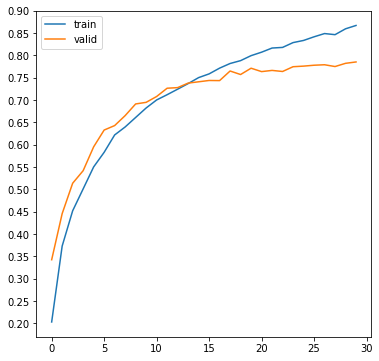

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [53]:
# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_oh_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.6877 - accuracy: 0.7746


[0.6876876950263977, 0.7746000289916992]

### Batch Normalization을 모델에 적용 후 성능 검증
- Layer를 따로 추가해야함.
- Batch -> Activation 순서라서, activatoin도 Layer따로 넣어줘야 함.
- Batch가 성능이 좋아서 대부분의 layer에 사용됨

In [66]:
import tensorflow as tf
import numpy as np
import random as python_random

np.random.seed(2021)
python_random.seed(2021)
tf.random.set_seed(2021)

In [69]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    labels = labels.squeeze()
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(train_images.shape, train_labels.shape)
train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
print(train_images.shape, train_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [70]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_20 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 activation_31 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_21 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                          

In [71]:
# label값이 원-핫 인코딩이 아니므로 loss는 categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=1000, epochs=30, validation_split=0.15)

Epoch 1/30
43/43 [==============================] - 5s 83ms/step - loss: 2.3615 - accuracy: 0.2222 - val_loss: 2.3148 - val_accuracy: 0.1251
Epoch 2/30
43/43 [==============================] - 3s 64ms/step - loss: 1.6529 - accuracy: 0.3883 - val_loss: 2.9128 - val_accuracy: 0.0953
Epoch 3/30
43/43 [==============================] - 3s 63ms/step - loss: 1.4167 - accuracy: 0.4781 - val_loss: 3.8558 - val_accuracy: 0.1028
Epoch 4/30
43/43 [==============================] - 3s 67ms/step - loss: 1.2713 - accuracy: 0.5376 - val_loss: 4.2432 - val_accuracy: 0.1016
Epoch 5/30
43/43 [==============================] - 3s 67ms/step - loss: 1.1555 - accuracy: 0.5826 - val_loss: 3.7858 - val_accuracy: 0.1132
Epoch 6/30
43/43 [==============================] - 3s 63ms/step - loss: 1.0415 - accuracy: 0.6268 - val_loss: 3.6644 - val_accuracy: 0.1679
Epoch 7/30
43/43 [==============================] - 3s 63ms/step - loss: 0.9465 - accuracy: 0.6632 - val_loss: 3.1206 - val_accuracy: 0.1984
Epoch 8/30
43

In [72]:
model.evaluate(test_images, test_oh_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.9395 - accuracy: 0.7517


[0.9394737482070923, 0.7516999840736389]

### He Normal 적용 후 Batch Normalization

In [58]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlat eau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_10 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                           

In [73]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=1000, epochs=30, validation_split=0.15)

Epoch 1/30
43/43 [==============================] - 6s 87ms/step - loss: 0.2582 - accuracy: 0.9094 - val_loss: 0.9318 - val_accuracy: 0.7589
Epoch 2/30
43/43 [==============================] - 3s 63ms/step - loss: 0.2074 - accuracy: 0.9263 - val_loss: 0.9837 - val_accuracy: 0.7636
Epoch 3/30
43/43 [==============================] - 3s 63ms/step - loss: 0.2000 - accuracy: 0.9285 - val_loss: 0.9856 - val_accuracy: 0.7677
Epoch 4/30
43/43 [==============================] - 3s 63ms/step - loss: 0.1918 - accuracy: 0.9323 - val_loss: 1.1866 - val_accuracy: 0.7469
Epoch 5/30
43/43 [==============================] - 3s 64ms/step - loss: 0.1795 - accuracy: 0.9378 - val_loss: 0.9131 - val_accuracy: 0.7891
Epoch 6/30
43/43 [==============================] - 3s 63ms/step - loss: 0.1781 - accuracy: 0.9372 - val_loss: 1.0214 - val_accuracy: 0.7601
Epoch 7/30
43/43 [==============================] - 3s 63ms/step - loss: 0.1666 - accuracy: 0.9412 - val_loss: 0.8987 - val_accuracy: 0.7803
Epoch 8/30
43

In [74]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 1s 5ms/step - loss: 1.3619 - accuracy: 0.7554


[1.3618903160095215, 0.7554000020027161]

In [75]:
preds = model.predict(np.expand_dims(test_images[0], axis=0))
predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

예측 클래스 값: [3]


### 학습 시 데이터를 섞는 shuffle 적용 유무에 따른  성능 테스트
- 하나의 epoch안에서 전체 데이터를 섞는 것은 fit()에 들어가있고, default=True

In [78]:
import tensorflow as tf
import numpy as np
import random as python_random
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# seed 를 설정해서 학습시마다 동일한 결과 유도. 불행히도 의도한 대로 동작하지 않음. 
def set_random_seed(seed_value):
    np.random.seed(seed_value)
    python_random.seed(seed_value)
    tf.random.set_seed(seed_value)

# 0 ~ 1사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 

In [79]:
from tensorflow.keras.datasets import cifar10

# random seed는 2021로 고정.
set_random_seed(2021)
# CIFAR10 데이터 재 로딩 및 Scaling/OHE 전처리 적용하여 학습/검증/데이터 세트 생성. 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)

print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(42500, 32, 32, 3) (42500, 10) (7500, 32, 32, 3) (7500, 10) (10000, 32, 32, 3) (10000, 10)


### model 생성을 위한 별도 함수 생성

In [80]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

def create_model():
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    #x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = Activation('relu')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=2)(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=2)(x)

    # cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
    x = Flatten(name='flatten')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(300, activation='relu', name='fc1')(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(10, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    #model.summary()
    
    return model


### shuffle을 False/True 변경하면서 테스트 

In [81]:
model = create_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# 먼저 shuffle을 false로 테스트 
noshuffle_history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=1000, epochs=30, shuffle=False, 
                    validation_data=(val_images, val_oh_labels))
evaluation_result = model.evaluate(test_images, test_oh_labels)
print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)

# model이 반복적으로 메모리 차지하는것을 없애기 위해서 수행. 
tf.keras.backend.clear_session()

Epoch 1/30
43/43 [==============================] - 5s 76ms/step - loss: 2.3376 - accuracy: 0.2409 - val_loss: 2.4457 - val_accuracy: 0.1133
Epoch 2/30
43/43 [==============================] - 3s 62ms/step - loss: 1.6577 - accuracy: 0.3828 - val_loss: 3.0840 - val_accuracy: 0.1025
Epoch 3/30
43/43 [==============================] - 3s 63ms/step - loss: 1.4320 - accuracy: 0.4721 - val_loss: 3.4022 - val_accuracy: 0.1025
Epoch 4/30
43/43 [==============================] - 3s 66ms/step - loss: 1.2569 - accuracy: 0.5388 - val_loss: 3.8098 - val_accuracy: 0.1025
Epoch 5/30
43/43 [==============================] - 3s 63ms/step - loss: 1.1304 - accuracy: 0.5946 - val_loss: 3.9496 - val_accuracy: 0.1036
Epoch 6/30
43/43 [==============================] - 3s 63ms/step - loss: 1.0178 - accuracy: 0.6359 - val_loss: 3.7889 - val_accuracy: 0.1189
Epoch 7/30
43/43 [==============================] - 3s 63ms/step - loss: 0.9154 - accuracy: 0.6738 - val_loss: 3.4466 - val_accuracy: 0.1627
Epoch 8/30
43

### shuffle을 True로 변경하고 학습 및 테스트
- 일반적으로 True가 성능이 조금 더 좋다

In [82]:
model = create_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# shuffle을 True로 변경하여 학습 및 테스트
shuffle_history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=1000, epochs=30, shuffle=True, 
                    validation_data=(val_images, val_oh_labels))
evaluation_result = model.evaluate(test_images, test_oh_labels, batch_size=1000)
print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)

tf.keras.backend.clear_session()

Epoch 1/30
43/43 [==============================] - 4s 70ms/step - loss: 2.4783 - accuracy: 0.2060 - val_loss: 2.3111 - val_accuracy: 0.1287
Epoch 2/30
43/43 [==============================] - 3s 63ms/step - loss: 1.7062 - accuracy: 0.3605 - val_loss: 3.0557 - val_accuracy: 0.1025
Epoch 3/30
43/43 [==============================] - 3s 63ms/step - loss: 1.4524 - accuracy: 0.4662 - val_loss: 3.4995 - val_accuracy: 0.1025
Epoch 4/30
43/43 [==============================] - 3s 63ms/step - loss: 1.2874 - accuracy: 0.5303 - val_loss: 4.0771 - val_accuracy: 0.1032
Epoch 5/30
43/43 [==============================] - 3s 63ms/step - loss: 1.1473 - accuracy: 0.5851 - val_loss: 4.0734 - val_accuracy: 0.1205
Epoch 6/30
43/43 [==============================] - 3s 63ms/step - loss: 1.0443 - accuracy: 0.6251 - val_loss: 3.9143 - val_accuracy: 0.1368
Epoch 7/30
43/43 [==============================] - 3s 63ms/step - loss: 0.9434 - accuracy: 0.6656 - val_loss: 3.1103 - val_accuracy: 0.1760
Epoch 8/30
43

### 위에서 수행한 Shuffle테스트 시 validation 데이터 기반 성능 검증 시각화 

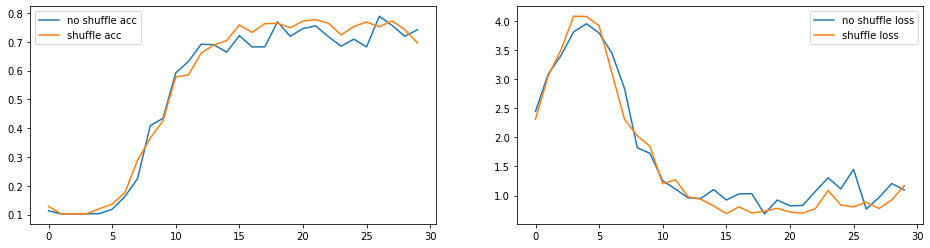

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history_shuffle(noshuffle_history, shuffle_history):
    figure, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
    # shuffle과 no shuffle의 validation accuracy 비교 
    axs[0].plot(noshuffle_history.history['val_accuracy'], label='no shuffle acc')
    axs[0].plot(shuffle_history.history['val_accuracy'], label='shuffle acc')
    # shuffle과 no shuffle의 validation loss 비교 
    axs[1].plot(noshuffle_history.history['val_loss'], label='no shuffle loss')
    axs[1].plot(shuffle_history.history['val_loss'], label='shuffle loss')
    axs[0].legend()
    axs[1].legend()

show_history_shuffle(noshuffle_history, shuffle_history)


### batch 크기를 32, 64, 256, 512로 변경하면서 테스트

In [85]:
b_sizes = [32, 64, 256, 512, 1000]
histories = []
evaluations = []
for b_size in b_sizes:
    model = create_model()
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    # batch_size를 순차적으로 32, 64, 256, 512로 변경하여 학습 및 evaluation 수행. 
    print('##### batch size :', b_size, '학습 #####')
    history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=b_size, epochs=30, 
                        shuffle=True, validation_data=(val_images, val_oh_labels))
    # batch size별 학습 history 결과 저장. 
    histories.append(history)
    # 테스트 세트로 evaluation 수행하고 batch size별 결과 저장. 
    evaluation_result = model.evaluate(test_images, test_oh_labels, batch_size=b_size)
    print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)
    evaluations.append(evaluation_result)
    
    tf.keras.backend.clear_session()

##### batch size : 32 학습 #####
Epoch 1/30
1329/1329 [==============================] - 16s 11ms/step - loss: 1.5439 - accuracy: 0.4444 - val_loss: 1.2613 - val_accuracy: 0.5595
Epoch 2/30
1329/1329 [==============================] - 13s 10ms/step - loss: 1.1096 - accuracy: 0.6034 - val_loss: 0.9582 - val_accuracy: 0.6683
Epoch 3/30
1329/1329 [==============================] - 13s 10ms/step - loss: 0.9180 - accuracy: 0.6808 - val_loss: 0.9836 - val_accuracy: 0.6633
Epoch 4/30
1329/1329 [==============================] - 9s 7ms/step - loss: 0.8036 - accuracy: 0.7213 - val_loss: 0.7973 - val_accuracy: 0.7261
Epoch 5/30
1329/1329 [==============================] - 9s 7ms/step - loss: 0.7163 - accuracy: 0.7544 - val_loss: 0.6693 - val_accuracy: 0.7736
Epoch 6/30
1329/1329 [==============================] - 9s 7ms/step - loss: 0.6441 - accuracy: 0.7813 - val_loss: 0.6723 - val_accuracy: 0.7688
Epoch 7/30
1329/1329 [==============================] - 9s 7ms/step - loss: 0.5854 - accuracy: 0.80

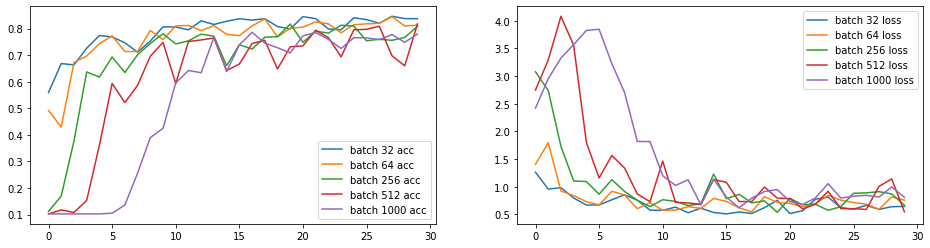

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history_batch(histories):
    figure, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))  
    # batch 크기별 validation accuracy 비교 
    axs[0].plot(histories[0].history['val_accuracy'], label='batch 32 acc')
    axs[0].plot(histories[1].history['val_accuracy'], label='batch 64 acc')
    axs[0].plot(histories[2].history['val_accuracy'], label='batch 256 acc')
    axs[0].plot(histories[3].history['val_accuracy'], label='batch 512 acc')
    axs[0].plot(histories[4].history['val_accuracy'], label='batch 1000 acc')
    
    # batch 크기별 validation loss 비교
    axs[1].plot(histories[0].history['val_loss'], label='batch 32 loss')
    axs[1].plot(histories[1].history['val_loss'], label='batch 64 loss')
    axs[1].plot(histories[2].history['val_loss'], label='batch 256 loss')
    axs[1].plot(histories[3].history['val_loss'], label='batch 512 loss')
    axs[1].plot(histories[4].history['val_loss'], label='batch 1000 loss')
    
    axs[0].legend()
    axs[1].legend()

show_history_batch(histories)